# Projeto de Análise Estatística com Testes de Hipótese

Esse projeto tem foco em poder utilizar diferentes tipos de testes de normalidade, paramétricos e não paramétricos, em diferentes cenários com diversas amostras. As principais bibliotecas para este projeto foram SciPy e Statsmodels.

# Carregando os Dados

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Área de Estudos/Alura/Formações/Estatística com Python/database/dados.csv')

In [ ]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


# Teste de Normalidade

A função *normaltest* testa a hipótese nula $H_0$ de que a amostra é proveniente de uma distribuição normal.

In [ ]:
from scipy.stats import normaltest

Significância do teste ($\alpha$)

In [ ]:
significancia = 0.05

Testando a Variável Renda

<Axes: >

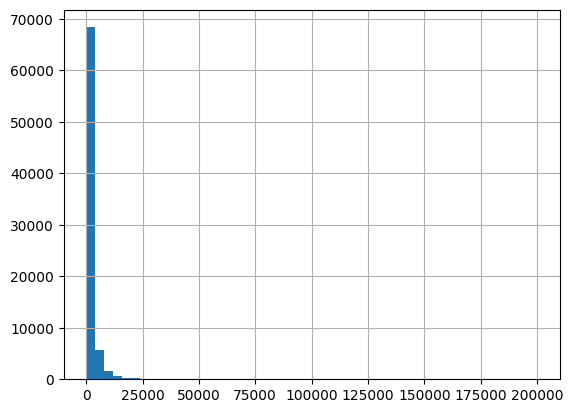

In [ ]:
dados.Renda.hist(bins = 50)                                                     # bins: quantidade de barras

<font color='red'>Critério do valor $p$</font>

> Rejeitar $H_0$ se o valor $p\leq 0,05$

In [ ]:
stat_test, p_valor = normaltest(dados.Renda)
print(stat_test)
print(p_valor)

152380.75803960307
0.0


In [ ]:
p_valor <= significancia

True

Testando a Variável Altura

<Axes: >

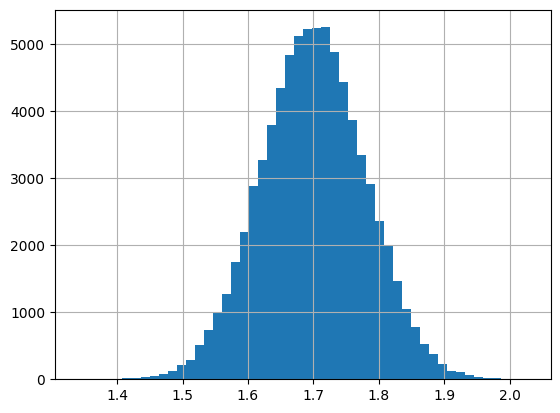

In [ ]:
dados.Altura.hist(bins = 50)

<font color='red'>Critério do valor $p$</font>

> Rejeitar $H_0$ se o valor $p\leq 0,05$

In [ ]:
stat_test, p_valor = normaltest(dados.Altura)
print(stat_test)
print(p_valor)

0.19973093957002253
0.9049591541967501


In [ ]:
p_valor <= significancia

False

# Testes Paramétricos

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=90%>

### Teste Bicaudal

<font color='red'>Problema</font>

A empresa **Suco Bom** produz **sucos de frutas em embalagens de 500 ml**. Seu processo de produção é quase todo automatizado e as embalagens de sucos são preenchidas por uma máquina que às vezes apresenta um certo desajuste, levando a erros no preenchimento das embalagens para mais ou menos conteúdo. Quando o volume médio cai abaixo de 500 ml, a empresa se preocupa em perder vendas e ter problemas com os orgãos fiscalizadores. Quando o volume passa de 500 ml, a empresa começa a se preocupar com prejuízos no processo de produção.

O setor de controle de qualidade da empresa **Suco Bom** extrai, periodicamente, **amostras de 50 embalagens** para monitorar o processo de produção. Para cada amostra, é realizado um **teste de hipóteses** para avaliar se o maquinário se desajustou. A equipe de controle de qualidade assume um **nível de significância de 5%**.

Suponha agora que uma **amostra de 50 embalagens** foi selecionada e que a **média amostral observada foi de 503,24 ml**. **Esse valor de média amostral é suficientemente maior que 500 ml para nos fazer rejeitar a hipótese de que a média do processo é de 500 ml ao nível de significância de 5%?**

In [ ]:
amostra = [509, 505, 495, 510, 496, 509, 497, 502, 503, 505,
           501, 505, 510, 505, 504, 497, 506, 506, 508, 505,
           497, 504, 500, 498, 506, 496, 508, 497, 503, 501,
           503, 506, 499, 498, 509, 507, 503, 499, 509, 495,
           502, 505, 504, 509, 508, 501, 505, 497, 508, 507]

In [ ]:
amostra = pd.DataFrame(amostra, columns=['Amostra'])
amostra.head()

,Amostra
0,509
1,505
2,495
3,510
4,496


In [ ]:
media_amostra = amostra.mean()[0]
media_amostra

503.24

In [ ]:
desvio_padrao_amostra = amostra.std()[0]
desvio_padrao_amostra # na fórmula é tido como 's'

4.48380305052735

In [ ]:
media = 500
significancia = 0.05
confianca = 1 - significancia
n = 50

formulação das hipóteses $H_0$ e $H_1$

<font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

$H_0: \mu = 500$

$H_1: \mu \neq 500$


O tamanho da amostra é maior que 30? **Sim**

O desvio padrão populacional é conhecido? **Não**

In [ ]:
from scipy.stats import norm

In [ ]:
probabilidade = (0.5 + (confianca / 2))
probabilidade

0.975

Obtendo $z_{\alpha/2}$

In [ ]:
z_alpha_2 = norm.ppf(probabilidade)
z_alpha_2

1.959963984540054

Cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

$$z = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

In [ ]:
z = (media_amostra - media) / (desvio_padrao_amostra / np.sqrt(n))
z

5.109559775991873

Aceitação ou rejeição da hipótese nula

<font color='red'>Critério do valor crítico</font>

> Teste Bicaudal <br>
> Rejeitar $H_0$ se $z \leq -z_{\alpha / 2}$ ou se $z \geq z_{\alpha / 2}$

In [ ]:
z <= -z_alpha_2

False

In [ ]:
z >= z_alpha_2

True

<font color='green'>Conclusão: Como a média amostral $\bar{x}$ é significativamente maior que 500 ml, rejeitamos $H_0$. Neste caso, devem ser tomadas providências para ajustar o maquinário que preenche as embalagens.</font>

<font color='red'>Critério do $p-valor$</font>

> Teste Bicaudal
> Rejeitar $H_0$ se o valor $p\leq\alpha$

In [ ]:
p_valor = 2 * (1 - norm.cdf(z))
p_valor

3.2291031715203644e-07

In [ ]:
p_valor = 2 * (norm.sf(z))
p_valor

3.229103172445771e-07

In [ ]:
p_valor <= significancia

True

As opções abaixo são uma forma mais objetiva de encontrar o valor p e a estatística teste.

amostra = estatística-teste <br>
value = valor p

In [ ]:
from statsmodels.stats.weightstats import ztest

In [ ]:
ztest(x1 = amostra, value = media)

(array([5.10955978]), array([3.22910317e-07]))

In [ ]:
from statsmodels.stats.weightstats import DescrStatsW

In [ ]:
test = DescrStatsW(amostra)

In [ ]:
z, p_valor = test.ztest_mean(value = media)
print(z[0])
print(p_valor[0])

5.109559775991874
3.2291031724457596e-07


### Teste Unicaudal

<font color='red'>Problema</font>

Um famoso fabricante de refrigerantes alega que uma lata de 350 ml de seu principal produto contém, **no máximo**, **37 gramas de açúcar**. Esta alegação nos leva a entender que a quantidade média de açúcar em uma lata de refrigerante deve ser **igual ou menor que 37 g**.

Um consumidor desconfiado e com conhecimentos em inferência estatística resolve testar a alegação do fabricante e seleciona, aleatóriamente, em um conjunto de estabelecimentos distintos, **uma amostra de 25 latas** do refrigerante em questão. Utilizando o equipamento correto o consumidor obteve as quantidades de açúcar em todas as 25 latas de sua amostra.

**Assumindo que essa população se distribua aproximadamente como uma normal e considerando um nível de significância de 5%, é possível aceitar como válida a alegação do fabricante?**

---

Construindo tabela $t$ de Student

In [ ]:
import pandas as pd
from scipy.stats import t as t_student

tabela_t_student = pd.DataFrame(
    [],
    index=[i for i in range(1, 31)],
    columns = [i / 100 for i in range(10, 0, -1)]
)

for index in tabela_t_student.index:
    for column in tabela_t_student.columns:
        tabela_t_student.loc[index, column] = t_student.ppf(1 - float(column) / 2, index)

index=[('Graus de Liberdade (n - 1)', i) for i in range(1, 31)]
tabela_t_student.index = pd.MultiIndex.from_tuples(index)

columns = [("{0:0.3f}".format(i / 100), "{0:0.3f}".format((i / 100) / 2)) for i in range(10, 0, -1)]
tabela_t_student.columns = pd.MultiIndex.from_tuples(columns)

tabela_t_student.rename_axis(['Bicaudal', 'Unicaudal'], axis=1, inplace = True)

tabela_t_student

Bicaudal                          0.100     0.090     0.080     0.070  \
Unicaudal                         0.050     0.045     0.040     0.035   
Graus de Liberdade (n - 1) 1   6.313752  7.026366  7.915815  9.057887   
                           2   2.919986  3.103977  3.319764  3.578247   
                           3   2.353363  2.470807  2.605427  2.762599   
                           4   2.131847    2.2261  2.332873  2.455892   
                           5   2.015048  2.097837  2.190958  2.297392   
                           6    1.94318  2.019201  2.104306  2.201059   
                           7   1.894579  1.966153  2.046011  2.136453   
                           8   1.859548  1.927986  2.004152  2.090166   
                           9   1.833113  1.899222  1.972653  2.055395   
                           10  1.812461  1.876774  1.948099  2.028327   
                           11  1.795885  1.858772  1.928427  2.006663   
                           12  1.782288  1.844015  1.912313  1.988934   
                           13  1.770933    1.8317  1.898874  1.974158   
                           14   1.76131  1.821267  1.887496  1.961656   
                           15   1.75305  1.812316  1.877739   1.95094   
                           16  1.745884  1.804553  1.869279  1.941654   
                           17  1.739607  1.797755  1.861875   1.93353   
                           18  1.734064  1.791754   1.85534  1.926362   
                           19  1.729133  1.786417   1.84953  1.919992   
                           20  1.724718   1.78164  1.844331  1.914292   
                           21  1.720743  1.777339  1.839651  1.909164   
                           22  1.717144  1.773447  1.835417  1.904524   
                           23  1.713872  1.769907  1.831567  1.900307   
                           24  1.710882  1.766675  1.828051  1.896457   
                           25  1.708141  1.763711  1.824828  1.892928   
                           26  1.705618  1.760983  1.821863  1.889682   
                           27  1.703288  1.758466  1.819126  1.886686   
                           28  1.701131  1.756134  1.816592  1.883912   
                           29  1.699127  1.753968  1.814238  1.881336   
                           30  1.697261  1.751952  1.812047  1.878938   

Bicaudal                           0.060      0.050      0.040      0.030  \
Unicaudal                          0.030      0.025      0.020      0.015   
Graus de Liberdade (n - 1) 1   10.578895  12.706205  15.894545  21.204949   
                           2    3.896425   4.302653   4.848732   5.642778   
                           3     2.95051   3.182446   3.481909   3.896046   
                           4    2.600762   2.776445   2.998528    3.29763   
                           5    2.421585   2.570582   2.756509   3.002875   
                           6    2.313263   2.446912   2.612242   2.828928   
                           7    2.240879   2.364624   2.516752   2.714573   
                           8    2.189155   2.306004   2.448985   2.633814   
                           9    2.150375   2.262157   2.398441   2.573804   
                           10   2.120234   2.228139   2.359315   2.527484   
                           11   2.096139   2.200985    2.32814   2.490664   
                           12   2.076441   2.178813   2.302722     2.4607   
                           13   2.060038   2.160369   2.281604   2.435845   
                           14   2.046169   2.144787   2.263781   2.414898   
                           15   2.034289    2.13145    2.24854   2.397005   
                           16      2.024   2.119905   2.235358   2.381545   
                           17   2.015002   2.109816   2.223845   2.368055   
                           18   2.007067   2.100922   2.213703    2.35618   
                           19   2.000017   2.093024   2.204701   2.345648   
                           20   1.993713   2.0

As células da tabela acima são valores de $t$ para uma área ou probabilidade na cauda superior da distribuição $t$.

Os **testes unicaudais** verificam as variáveis em relação a um piso ou a um teto e avaliam os valores máximos ou mínimos esperados para os parâmetros em estudo e a chance de as estatísticas amostrais serem inferiores ou superiores a dado limite.

In [ ]:
amostra = [37.27, 36.42, 34.84, 34.60, 37.49,
           36.53, 35.49, 36.90, 34.52, 37.30,
           34.99, 36.55, 36.29, 36.06, 37.42,
           34.47, 36.70, 35.86, 36.80, 36.92,
           37.04, 36.39, 37.32, 36.64, 35.45]

In [ ]:
amostra = pd.DataFrame(amostra, columns=['Amostra'])
amostra

,Amostra
0,37.27
1,36.42
2,34.84
3,34.60
4,37.49
5,36.53
6,35.49
7,36.90
8,34.52
9,37.30


In [ ]:
media_amostra = amostra.mean()[0]
media_amostra

36.2504

In [ ]:
desvio_padrao_amostra = amostra.std()[0]
desvio_padrao_amostra

0.9667535018469455

In [ ]:
media = 37
significancia = 0.05
confianca = 1 - significancia
n = 25
graus_de_liberdade = n - 1

Formulação das hipóteses $H_0$ e $H_1$


<font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

$H_0: \mu \leq 37$

$H_1: \mu > 37$

O tamanho da amostra é maior que 30?
Resp.: Não

Podemos afirmar que a população se distribui aproximadamente como uma normal?
Resp.: Sim

O desvio padrão populacional é conhecido?
Resp.: Não

In [ ]:
from scipy.stats import t as t_student

In [ ]:
tabela_t_student[22:25]

Bicaudal                          0.100     0.090     0.080     0.070  \
Unicaudal                         0.050     0.045     0.040     0.035   
Graus de Liberdade (n - 1) 23  1.713872  1.769907  1.831567  1.900307   
                           24  1.710882  1.766675  1.828051  1.896457   
                           25  1.708141  1.763711  1.824828  1.892928   

Bicaudal                          0.060     0.050     0.040     0.030  \
Unicaudal                         0.030     0.025     0.020     0.015   
Graus de Liberdade (n - 1) 23  1.978249  2.068658  2.176958  2.313231   
                           24  1.973994  2.063899  2.171545  2.306913   
                           25  1.970095  2.059539  2.166587   2.30113   

Bicaudal                          0.020     0.010  
Unicaudal                         0.010     0.005  
Graus de Liberdade (n - 1) 23  2.499867  2.807336  
                           24  2.492159   2.79694  
                           25  2.485107  2.787436

Obtendo $t_{\alpha}$

In [ ]:
t_alpha = t_student.ppf(confianca, graus_de_liberdade)
t_alpha

1.7108820799094275

Cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

$$t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

In [ ]:
t = (media_amostra - media) / (desvio_padrao_amostra / np.sqrt(n))
t

-3.876893119952081

Aceitação ou rejeição da hipótese nula

<font color='red'>Critério do valor crítico</font>

> Teste Unicaudal Superior <br>
> Rejeitar $H_0$ se $t \geq t_{\alpha}$

In [ ]:
t >= t_alpha

False

<font color='green'>Conclusão: Com um nível de confiança de 95% não podemos rejeitar $H_0$, ou seja, a alegação do fabricante é verdadeira.</font>

<font color='red'>Critério do valor $p$</font>

> Teste Unicaudal Superior <br>
> Rejeitar $H_0$ se o valor $p\leq\alpha$

In [ ]:
t

-3.876893119952081

In [ ]:
p_valor = t_student.sf(t, df = 24)                                              # importante também passar o grau de liberdade
p_valor

0.9996406170303819

In [ ]:
p_valor <= significancia

False

Não rejeito a hipótese nula.

In [ ]:
# Outra forma de obter os mesmo resultados de forma mais objetiva

test = DescrStatsW(amostra)                                                     # passando a estatística-teste

In [ ]:
t, p_valor, df = test.ttest_mean(value = media, alternative = 'larger')
print(t[0])
print(p_valor[0])
print(df)

-3.8768931199520447
0.9996406170303819
24.0


In [ ]:
p_valor[0] <= significancia

False

### Testes para Duas Amostras

Em nosso dataset temos os rendimento dos chefes de domicílio obtidos da Pesquisa Nacional por Amostra de Domicílios - PNAD no ano de 2015. Um problema bastante conhecido em nosso país diz respeito a desigualdade de renda, principalmente entre homens e mulheres.

Duas amostras aleatórias, uma de **500 homens** e outra com **500 mulheres**, foram selecionadas em nosso dataset. Com o objetivo de comprovar tal desigualdade, **teste a igualdade das médias** entre estas duas amostras com um nível de **significância de 1%**.

---

É possível também utilizar testes de hipóteses para comparar duas diferentes amostras. Neste tipo de teste se deseja decidir se uma amostra é diferente da outra.

Seleção das amostras:

In [ ]:
homens = dados.query('Sexo == 0').sample(n = 500, random_state = 101).Renda

In [ ]:
mulheres = dados.query('Sexo == 1').sample(n = 500, random_state = 101).Renda

Dados do problema:

In [ ]:
media_amostra_M = mulheres.mean()
media_amostra_M

1357.528

In [ ]:
desvio_padrao_amostra_M = mulheres.std()
desvio_padrao_amostra_M

1569.901190748458

In [ ]:
media_amostra_H = homens.mean()
media_amostra_H

2142.608

In [ ]:
desvio_padrao_amostra_H = homens.std()
desvio_padrao_amostra_H

2548.0508024998717

In [ ]:
significancia = 0.01
confianca = 1 - significancia
n_M = 500
n_H = 500
D_0 = 0

**Passo 1** - formulação das hipóteses $H_0$ e $H_1$

<font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

$\mu_1 \Rightarrow$ Média das rendas dos chefes de domicílios do sexo masculino <br>
$\mu_2 \Rightarrow$ Média das rendas dos chefes de domicílios do sexo feminino

$
\begin{cases}
H_0: \mu_1 \leq \mu_2\\
H_1: \mu_1 > \mu_2
\end{cases}
$

ou

$
\begin{cases}
H_0: \mu_1 -\mu_2 \leq 0\\
H_1: \mu_1 -\mu_2 > 0
\end{cases}
$

---

<font color='red'>Observação importante</font>
> Em testes que envolvam duas amostras com o emprego da tabela $t$ de Student, o número de graus de liberdade será sempre igual a $n_1 + n_2 - 2$

O tamanho da amostra é maior que 30?
Resp.: Sim

O desvio padrão populacional é conhecido?
Resp.: Não

In [ ]:
probabilidade = confianca
probabilidade

0.99

In [ ]:
# Área de rejeição de H_0

z_alpha = norm.ppf(probabilidade)
z_alpha.round(2)

2.33

Cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

$$z = \frac{(\bar{x_1} - \bar{x_2})-D_0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

In [ ]:
numerador = (media_amostra_H - media_amostra_M) - D_0

denominador = np.sqrt((desvio_padrao_amostra_H ** 2 / n_H) + (desvio_padrao_amostra_M ** 2 / n_M))

z = numerador / denominador

z

5.8656200577647555

<font color='red'>Critério do valor crítico</font>

> Teste Unicaudal <br>
> Rejeitar $H_0$ se $z \geq z_{\alpha}$

In [ ]:
z >= z_alpha

True

<font color='green'>Conclusão: Com um nível de confiança de 99% rejeitamos $H_0$, isto é, concluímos que a média das rendas dos chefes de domicílios do sexo masculino é maior que a média das rendas das chefes de domicílios do sexo feminino. Confirmando a alegação de desigualdade de renda entre os sexos.</font>

---

Aplicando p-valor

In [ ]:
from statsmodels.stats.weightstats import CompareMeans

In [ ]:
test_H = DescrStatsW(homens)

In [ ]:
test_M = DescrStatsW(mulheres)

In [ ]:
test_A = test_H.get_compare(test_M)

In [ ]:
z, p_valor = test_A.ztest_ind(alternative='larger', value=0)
p_valor

2.2372867859458255e-09

In [ ]:
p_valor <= significancia # 0,01

True

In [ ]:
test_B = CompareMeans(test_H, test_M)

In [ ]:
z, p_valor = test_B.ztest_ind(alternative='larger', value=0)
p_valor

2.2372867859458255e-09

In [ ]:
p_valor <= significancia

True

# Testes Não Paramétricos

### Teste de Qui-Quadrado

O trabalho com pequenas amostras pode levar a não aceitação da validade do teorema central do limite e também na impossibilidade de fazer suposições sobre a distribuição da variável avaliada. Quando isso ocorre torna-se necessária a aplicação de testes não paramétricos. Nos testes não paramétricos, não fazemos hipóteses sobre a distribuição (de probabilidade) das quais as observações são extraídas.

<br>

<font color='red'>Problema</font>

Antes de cada partida do campeonato nacional de futebol, as moedas utilizadas pelos árbitros devem ser verificadas para se ter certeza de que não são viciadas, ou seja, que não tendam para determinado resultado. Para isso um teste simples deve ser realizado antes de cada partida. Este teste consiste em lançar a moeda do jogo **50 vezes** e contar as frequências de **CARAS** e **COROAS** obtidas. A tabela abaixo mostra o resultado obtido no experimento:

||CARA|COROA|
|-|-|-|
|Observado|17|33|
|Esperado|25|25|

A um **nível de significância de 5%**, é possível afirmar que a moeda não é honesta, isto é, que a moeda apresenta uma probabilidade maior de cair com a face **CARA** voltada para cima?

---

O teste do $\chi^2$ testa a hipótese nula de não haver diferença entre as frequências observadas de um determinado evento e as frequências que são realmente esperadas para este evento.

Os passos de aplicação do teste são bem parecidos aos vistos para os testes paramétricos.

Construindo tabela $\chi^2$

In [ ]:
import pandas as pd
from scipy.stats import chi

tabela_t_chi_2 = pd.DataFrame(
    [],
    index=[i for i in range(1, 31)],
    columns = [0.005, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.975, 0.95, 0.99, 0.995]
)

for index in tabela_t_chi_2.index:
    for column in tabela_t_chi_2.columns:
        tabela_t_chi_2.loc[index, column] = "{0:0.4f}".format(chi.ppf(float(column), index)**2)

tabela_t_chi_2.index.name='Graus de Liberdade'
tabela_t_chi_2.rename_axis(['p'], axis=1, inplace = True)

tabela_t_chi_2

p,0.005,0.010,0.025,0.050,0.100,0.250,0.500,0.750,0.900,0.975,0.950,0.990,0.995
Graus de Liberdade,,,,,,,,,,,,,
1,0.0000,0.0002,0.0010,0.0039,0.0158,0.1015,0.4549,1.3233,2.7055,5.0239,3.8415,6.6349,7.8794
2,0.0100,0.0201,0.0506,0.1026,0.2107,0.5754,1.3863,2.7726,4.6052,7.3778,5.9915,9.2103,10.5966
3,0.0717,0.1148,0.2158,0.3518,0.5844,1.2125,2.3660,4.1083,6.2514,9.3484,7.8147,11.3449,12.8382
4,0.2070,0.2971,0.4844,0.7107,1.0636,1.9226,3.3567,5.3853,7.7794,11.1433,9.4877,13.2767,14.8603
5,0.4117,0.5543,0.8312,1.1455,1.6103,2.6746,4.3515,6.6257,9.2364,12.8325,11.0705,15.0863,16.7496
6,0.6757,0.8721,1.2373,1.6354,2.2041,3.4546,5.3481,7.8408,10.6446,14.4494,12.5916,16.8119,18.5476
7,0.9893,1.2390,1.6899,2.1673,2.8331,4.2549,6.3458,9.0371,12.0170,16.0128,14.0671,18.4753,20.2777
8,1.3444,1.6465,2.1797,2.7326,3.4895,5.0706,7.3441,10.2189,13.3616,17.5345,15.5073,20.0902,21.9550
9,1.7349,2.0879,2.7004,3.3251,4.1682,5.8988,8.3428,11.3888,14.6837,19.0228,16.9190,21.6660,23.5894


Tabela com os valores de $\chi_p^2$ em função dos graus de liberdade $(n - 1)$ e de $p = P(\chi^2 \leq \chi_p^2)$

<br>
Dados do problema:

In [ ]:
F_Observada = [17, 33]
F_Esperada = [25, 25]
significancia = 0.05
confianca = 1 - significancia
k = 2 # Número de eventos possíveis
graus_de_liberdade = k - 1

<font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

$H_0: F_{CARA} = F_{COROA}$

$H_1: F_{CARA} \neq F_{COROA}$

<br>
Fixação da significância do teste ($\alpha$):

In [ ]:
tabela_t_chi_2[:3]

p,0.005,0.010,0.025,0.050,0.100,0.250,0.500,0.750,0.900,0.975,0.950,0.990,0.995
Graus de Liberdade,,,,,,,,,,,,,
1,0.0000,0.0002,0.0010,0.0039,0.0158,0.1015,0.4549,1.3233,2.7055,5.0239,3.8415,6.6349,7.8794
2,0.0100,0.0201,0.0506,0.1026,0.2107,0.5754,1.3863,2.7726,4.6052,7.3778,5.9915,9.2103,10.5966
3,0.0717,0.1148,0.2158,0.3518,0.5844,1.2125,2.3660,4.1083,6.2514,9.3484,7.8147,11.3449,12.8382


Obtendo $\chi_{\alpha}^2$

In [ ]:
chi_2_alpha = chi.ppf(confianca, graus_de_liberdade) ** 2
chi_2_alpha

3.8414588206941245

Cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

$$\chi^2 = \sum_{i=1}^{k}{\frac{(F_{i}^{Obs} - F_{i}^{Esp})^2}{F_{i}^{Esp}}}$$

Onde

$F_{i}^{Obs}$ = frequência observada para o evento $i$

$F_{i}^{Esp}$ = frequência esperada para o evento $i$

$k$ = total de eventos possíveis

In [ ]:
chi_2 = ( (F_Observada[0] - F_Esperada[0]) ** 2 /  F_Esperada[0] ) + ( (F_Observada[1] - F_Esperada[1]) ** 2 /  F_Esperada[1] )
chi_2

5.12

In [ ]:
chi_2 = 0
for i in range(k):
  chi_2 += (F_Observada[i] - F_Esperada[i]) ** 2 /  F_Esperada[i]

chi_2

5.12

Aceitação ou rejeição da hipótese nula

<font color='red'>Critério do valor crítico</font>

> Rejeitar $H_0$ se $\chi_{teste}^2 > \chi_{\alpha}^2$

In [ ]:
chi_2 > chi_2_alpha

True

**<font color='green'>Conclusão: Com um nível de confiança de 95% rejeitamos a hipótese nula ($H_0$) e concluímos que as frequências observadas e esperadas são discrepantes, ou seja, a moeda não é honesta e precisa ser substituída.</font>**

<font color='red'>Critério do valor $p$</font>

> Rejeitar $H_0$ se o valor $p\leq\alpha$

In [ ]:
chi_2

5.12

In [ ]:
raiz_chi_2 = np.sqrt(chi_2)
raiz_chi_2

2.262741699796952

In [ ]:
p_valor = chi.sf(raiz_chi_2, df=1)
p_valor

0.023651616655356

In [ ]:
from scipy.stats import chisquare

In [ ]:
# Forma mais objetiva de conseguir o valor-p

chi_2, p_valor = chisquare(f_obs=F_Observada, f_exp=F_Esperada)
print(chi_2)
print(p_valor)

5.12
0.023651616655356


In [ ]:
p_valor <= significancia

True

### Teste Wilcoxon

<font color='red'>Problema</font>

Um novo tratamento para acabar com o hábito de fumar está sendo empregado em um grupo de **35 pacientes** voluntários. De cada paciente testado foram obtidas as informações de quantidades de cigarros consumidos por dia antes e depois do término do tratamento. Assumindo um **nível de confiança de 95%** é possível concluir que, depois da aplicação do novo tratamento, houve uma mudança no hábito de fumar do grupo de pacientes testado?

**Comparação de duas populações - amostras dependentes**

---

Empregado quando se deseja comparar duas amostras relacionadas, amostras emparelhadas. Pode ser aplicado quando se deseja testar a diferença de duas condições, isto é, quando um mesmo elemento é submetido a duas medidas.

<br>
Dados do problema:

In [ ]:
fumo = {
    'Antes': [39, 25, 24, 50, 13, 52, 21, 29, 10, 22, 50, 15, 36, 39, 52, 48, 24, 15, 40, 41, 17, 12, 21, 49, 14, 55, 46, 22, 28, 23, 37, 17, 31, 49, 49],
    'Depois': [16, 8, 12, 0, 14, 16, 13, 12, 19, 17, 17, 2, 15, 10, 20, 13, 0, 4, 16, 18, 16, 16, 9, 9, 18, 4, 17, 0, 11, 14, 0, 19, 2, 9, 6]
}
significancia = 0.05
confianca = 1 - significancia
n = 35

In [ ]:
fumo = pd.DataFrame(fumo)
fumo.head()

,Antes,Depois
0,39,16
1,25,8
2,24,12
3,50,0
4,13,14


In [ ]:
media_antes = fumo.Antes.mean()
media_antes

31.857142857142858

In [ ]:
media_depois = fumo.Depois.mean()
media_depois

11.2

formulação das hipóteses $H_0$ e $H_1$

<font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

$H_0: \mu_{antes} = \mu_{depois}$

$H_1: \mu_{antes} > \mu_{depois}$

<br>

O tamanho da amostra é maior que 20? Sim.

<br>

Obtendo $z_{\alpha/2}$:

In [ ]:
# Pode ser considerado como um teste bicaudal

probabilidade = (0.5 + (confianca / 2))
probabilidade

0.975

In [ ]:
z_alpha_2 = norm.ppf(probabilidade)
z_alpha_2.round(2)

1.96

Cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

$$Z = \frac{T - \mu_T}{\sigma_T}$$

Onde

$T$ = menor das somas de postos de mesmo sinal

$$\mu_T = \frac{n(n+1)}{4}$$
$$\sigma_T = \sqrt{\frac{n(n + 1)(2n + 1)}{24}}$$

<br>

Construindo a tabela com os postos:

In [ ]:
fumo

,Antes,Depois
0,39,16
1,25,8
2,24,12
3,50,0
4,13,14
5,52,16
6,21,13
7,29,12
8,10,19
9,22,17


In [ ]:
fumo['Dif'] = fumo.Depois - fumo.Antes
fumo

,Antes,Depois,Dif
0,39,16,-23
1,25,8,-17
2,24,12,-12
3,50,0,-50
4,13,14,1
5,52,16,-36
6,21,13,-8
7,29,12,-17
8,10,19,9
9,22,17,-5


In [ ]:
fumo['|Dif|'] = fumo.Dif.abs()                                                  # traz um valor absoluto ignorando os sinais
fumo

,Antes,Depois,Dif,|Dif|
0,39,16,-23,23
1,25,8,-17,17
2,24,12,-12,12
3,50,0,-50,50
4,13,14,1,1
5,52,16,-36,36
6,21,13,-8,8
7,29,12,-17,17
8,10,19,9,9
9,22,17,-5,5


In [ ]:
fumo.sort_values(by = '|Dif|', inplace = True)                                  # Ordenando os números
fumo

,Antes,Depois,Dif,|Dif|
4,13,14,1,1
20,17,16,-1,1
31,17,19,2,2
21,12,16,4,4
24,14,18,4,4
9,22,17,-5,5
6,21,13,-8,8
29,23,14,-9,9
8,10,19,9,9
17,15,4,-11,11


In [ ]:
fumo['Posto'] = range(1, len(fumo) + 1)
fumo

,Antes,Depois,Dif,|Dif|,Posto
4,13,14,1,1,1
20,17,16,-1,1,2
31,17,19,2,2,3
21,12,16,4,4,4
24,14,18,4,4,5
9,22,17,-5,5,6
6,21,13,-8,8,7
29,23,14,-9,9,8
8,10,19,9,9,9
17,15,4,-11,11,10


In [ ]:
posto = fumo[['|Dif|', 'Posto']].groupby(['|Dif|']).mean()
posto

,Posto
|Dif|,
1,1.5
2,3.0
4,4.5
5,6.0
8,7.0
9,8.5
11,10.0
12,11.5
13,13.0


In [ ]:
posto.reset_index(inplace = True)                                               # Tornou o |Dif| numa variavel só
posto

,|Dif|,Posto
0,1,1.5
1,2,3.0
2,4,4.5
3,5,6.0
4,8,7.0
5,9,8.5
6,11,10.0
7,12,11.5
8,13,13.0
9,17,15.0


In [ ]:
fumo.drop(['Posto'], axis = 1, inplace = True)
fumo

,Antes,Depois,Dif,|Dif|
4,13,14,1,1
20,17,16,-1,1
31,17,19,2,2
21,12,16,4,4
24,14,18,4,4
9,22,17,-5,5
6,21,13,-8,8
29,23,14,-9,9
8,10,19,9,9
17,15,4,-11,11


In [ ]:
fumo = fumo.merge(posto, left_on='|Dif|', right_on='|Dif|', how = 'left')
fumo

,Antes,Depois,Dif,|Dif|,Posto
0,13,14,1,1,1.5
1,17,16,-1,1,1.5
2,17,19,2,2,3.0
3,12,16,4,4,4.5
4,14,18,4,4,4.5
5,22,17,-5,5,6.0
6,21,13,-8,8,7.0
7,23,14,-9,9,8.5
8,10,19,9,9,8.5
9,15,4,-11,11,10.0


Criando colunas para posto quando a diferença for positiva e outra quando for negativa

In [ ]:
fumo['Posto (+)'] = fumo.apply(lambda x: x.Posto if x.Dif > 0 else 0, axis = 1)
fumo

,Antes,Depois,Dif,|Dif|,Posto,Posto (+)
0,13,14,1,1,1.5,1.5
1,17,16,-1,1,1.5,0.0
2,17,19,2,2,3.0,3.0
3,12,16,4,4,4.5,4.5
4,14,18,4,4,4.5,4.5
5,22,17,-5,5,6.0,0.0
6,21,13,-8,8,7.0,0.0
7,23,14,-9,9,8.5,0.0
8,10,19,9,9,8.5,8.5
9,15,4,-11,11,10.0,0.0


In [ ]:
fumo['Posto (-)'] = fumo.apply(lambda x: x.Posto if x.Dif < 0 else 0, axis = 1)
fumo

,Antes,Depois,Dif,|Dif|,Posto,Posto (+),Posto (-)
0,13,14,1,1,1.5,1.5,0.0
1,17,16,-1,1,1.5,0.0,1.5
2,17,19,2,2,3.0,3.0,0.0
3,12,16,4,4,4.5,4.5,0.0
4,14,18,4,4,4.5,4.5,0.0
5,22,17,-5,5,6.0,0.0,6.0
6,21,13,-8,8,7.0,0.0,7.0
7,23,14,-9,9,8.5,0.0,8.5
8,10,19,9,9,8.5,8.5,0.0
9,15,4,-11,11,10.0,0.0,10.0


In [ ]:
fumo.drop(['Posto'], axis = 1, inplace = True)
fumo

,Antes,Depois,Dif,|Dif|,Posto (+),Posto (-)
0,13,14,1,1,1.5,0.0
1,17,16,-1,1,0.0,1.5
2,17,19,2,2,3.0,0.0
3,12,16,4,4,4.5,0.0
4,14,18,4,4,4.5,0.0
5,22,17,-5,5,0.0,6.0
6,21,13,-8,8,0.0,7.0
7,23,14,-9,9,0.0,8.5
8,10,19,9,9,8.5,0.0
9,15,4,-11,11,0.0,10.0


Obter $T$

$T$ = menor das somas de postos de mesmo sinal

In [ ]:
T = min(fumo['Posto (+)'].sum(), fumo['Posto (-)'].sum())
T

22.0

Obter $\mu_T$

$$\mu_T = \frac{n(n+1)}{4}$$


In [ ]:
mu_T = (n * (n + 1)) / 4
mu_T

315.0

Obter $\sigma_T$

$$\sigma_T = \sqrt{\frac{n(n + 1)(2n + 1)}{24}}$$

In [ ]:
sigma_T = np.sqrt((n * (n + 1) * ((2 * n) + 1)) / 24)
sigma_T

61.053255441458646

Obter $Z_{teste}$

$$Z = \frac{T - \mu_T}{\sigma_T}$$

In [ ]:
Z = (T - mu_T) / sigma_T
Z

-4.799088891843698

<font color='red'>Critério do valor crítico</font>

> Rejeitar $H_0$ se $Z \leq -z_{\alpha / 2}$ ou se $Z \geq z_{\alpha / 2}$

In [ ]:
Z <= -z_alpha_2

True

In [ ]:
Z >= z_alpha_2

False

<font color='green'>Conclusão: Rejeitamos a hipótese de que não existe diferença entre os grupos, isto é, existe uma diferença entre as médias de cigarros fumados pelos pacientes antes e depois do tratamento. E como é possível verificar através das médias de cigarros fumados por dia antes (31.86) e depois (11.2) do tratamento, podemos concluir que o tratamento apresentou resultado satisfatório.</font>

<font color='red'>Critério do valor $p$</font>

> Rejeitar $H_0$ se o valor $p\leq\alpha$

In [ ]:
from scipy.stats import wilcoxon

In [ ]:
T, p_valor = wilcoxon(fumo.Antes, fumo.Depois)
print(T)
print(p_valor)

22.0
3.119930624961853e-08


In [ ]:
p_valor <= significancia

True

### Teste de Mann-Whitney

<font color='red'>Problema</font>

Em nosso dataset temos os rendimento dos chefes de domicílio obtidos da Pesquisa Nacional por Amostra de Domicílios - PNAD no ano de 2015. Um problema bastante conhecido em nosso país diz respeito a desigualdade de renda, principalmente entre homens e mulheres.

Duas amostras aleatórias, uma de **6 homens** e outra com **8 mulheres**, foram selecionadas em nosso dataset. Com o objetivo de comprovar tal desigualdade **teste a igualdade das médias** entra estas duas amostras com um nível de **significância de 5%**.

Comparação de duas população - amostras independentes

---

Mann-Whitney é um teste não paramétrico utilizado para verificar se duas amostras independentes foram selecionadas a partir de populações que têm a mesma média. Por ser um teste não paramétrico, Mann-Whitney torna-se uma alternativa ao teste paramétrico de comparação de médias.

É uma versão alternativa ao teste t, porém dessa vez não paramétrico.

In [ ]:
mulheres = dados.query('Sexo == 1 and Renda > 0').sample(n = 8, random_state = 101).Renda

In [ ]:
homens = dados.query('Sexo == 0 and Renda > 0').sample(n = 6, random_state = 101).Renda

Dados do problema

In [ ]:
media_amostra_M = mulheres.mean()
media_amostra_M

1090.75

In [ ]:
media_amostra_H = homens.mean()
media_amostra_H

1341.6666666666667

In [ ]:
significancia = 0.05
confianca = 1 - significancia
n_1 = len(homens)                                                               # no padrão mann-whitney o n1 será sempre a amostra de tamanho menor
n_2 = len(mulheres)

Formulação das hipóteses $H_0$ e $H_1$

<font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

$\mu_m \Rightarrow$ Média das rendas dos chefes de domicílios do sexo feminino <br>
$\mu_h \Rightarrow$ Média das rendas dos chefes de domicílios do sexo masculino

$
\begin{cases}
H_0: \mu_m = \mu_h\\
H_1: \mu_m < \mu_h
\end{cases}
$

<br>
Além disso, deve-se optar pela distribuição **$t$ de Student**, já que nada é mencionado sobre a distribuição da população, o desvio padrão populacional é desconhecido e o número de elementos investigados é menor que 30.

<br>

Obtendo $t_{\alpha}$:

In [ ]:
graus_de_liberdade = n_1 + n_2 - 2                                              # quando temos duas amostras o grau de liberdade sempre será n1+n2-2
graus_de_liberdade

12

In [ ]:
tabela_t_student[10:13]

Bicaudal                          0.100     0.090     0.080     0.070  \
Unicaudal                         0.050     0.045     0.040     0.035   
Graus de Liberdade (n - 1) 11  1.795885  1.858772  1.928427  2.006663   
                           12  1.782288  1.844015  1.912313  1.988934   
                           13  1.770933    1.8317  1.898874  1.974158   

Bicaudal                          0.060     0.050     0.040     0.030  \
Unicaudal                         0.030     0.025     0.020     0.015   
Graus de Liberdade (n - 1) 11  2.096139  2.200985   2.32814  2.490664   
                           12  2.076441  2.178813  2.302722    2.4607   
                           13  2.060038  2.160369  2.281604  2.435845   

Bicaudal                          0.020     0.010  
Unicaudal                         0.010     0.005  
Graus de Liberdade (n - 1) 11  2.718079  3.105807  
                           12  2.680998   3.05454  
                           13  2.650309  3.012276

In [ ]:
t_alpha = t_student.ppf(significancia, graus_de_liberdade)
t_alpha.round(2)

-1.78

Cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste
1. Definir os n's:
$n_1$ = nº de elementos do menor grupo
$n_2$ = nº de elementos do maior grupo
---
2. Obter a soma dos postos
$R_1$ = soma dos postos do grupo $n_1$
$R_2$ = soma dos postos do grupo $n_2$
---
3. Obter as estatísticas
$$u_1 = n_1 \times n_2 + \frac{n_1 \times (n_1 + 1)}{2} - R_1$$
$$u_2 = n_1 \times n_2 + \frac{n_2 \times (n_2 + 1)}{2} - R_2$$
---
4. Selecionar o menor U
$$u = min(u_1, u_2)$$
---
5. Obter a estatística de teste
$$Z = \frac{u - \mu{(u)}}{\sigma{(u)}}$$

Onde

$$\mu{(u)} = \frac{n_1 \times n_2}{2}$$
$$\sigma{(u)} = \sqrt{\frac{n_1 \times n_2 \times (n_1 + n_2 + 1)}{12}}$$

Obtendo os postos:

In [ ]:
H = pd.DataFrame(homens)
H['Sexo'] = 'Homens'
H

,Renda,Sexo
67872,1200,Homens
30211,2000,Homens
64406,850,Homens
26519,800,Homens
61540,2000,Homens
17422,1200,Homens


In [ ]:
M = pd.DataFrame(mulheres)
M['Sexo'] = 'Mulheres'
M

,Renda,Sexo
6251,1100,Mulheres
34764,400,Mulheres
40596,788,Mulheres
11303,4300,Mulheres
22733,250,Mulheres
24707,400,Mulheres
60340,700,Mulheres
17035,788,Mulheres


In [ ]:
sexo = H.append(M)
sexo.reset_index(inplace = True, drop = True)                                   # ajustando o indice
sexo

<ipython-input-127-639e6850106c>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sexo = H.append(M)


,Renda,Sexo
0,1200,Homens
1,2000,Homens
2,850,Homens
3,800,Homens
4,2000,Homens
5,1200,Homens
6,1100,Mulheres
7,400,Mulheres
8,788,Mulheres
9,4300,Mulheres


In [ ]:
sexo.sort_values(by = 'Renda', inplace = True)                                  # ordenando os resultados
sexo

,Renda,Sexo
10,250,Mulheres
7,400,Mulheres
11,400,Mulheres
12,700,Mulheres
8,788,Mulheres
13,788,Mulheres
3,800,Homens
2,850,Homens
6,1100,Mulheres
0,1200,Homens


In [ ]:
sexo['Posto'] = range(1, len(sexo) + 1) # criar a variável de ordenação com o total de registros de ambos os sexos
sexo

,Renda,Sexo,Posto
10,250,Mulheres,1
7,400,Mulheres,2
11,400,Mulheres,3
12,700,Mulheres,4
8,788,Mulheres,5
13,788,Mulheres,6
3,800,Homens,7
2,850,Homens,8
6,1100,Mulheres,9
0,1200,Homens,10


In [ ]:
posto = sexo[['Renda', 'Posto']].groupby(['Renda']).mean()
posto

,Posto
Renda,
250,1.0
400,2.5
700,4.0
788,5.5
800,7.0
850,8.0
1100,9.0
1200,10.5
2000,12.5


In [ ]:
posto.reset_index(inplace = True)
posto

,Renda,Posto
0,250,1.0
1,400,2.5
2,700,4.0
3,788,5.5
4,800,7.0
5,850,8.0
6,1100,9.0
7,1200,10.5
8,2000,12.5
9,4300,14.0


In [ ]:
sexo.drop(['Posto'], axis = 1, inplace = True)                                  # para evitar conflito, retiro o posto do arquivo incial 'sexo'
sexo

,Renda,Sexo
10,250,Mulheres
7,400,Mulheres
11,400,Mulheres
12,700,Mulheres
8,788,Mulheres
13,788,Mulheres
3,800,Homens
2,850,Homens
6,1100,Mulheres
0,1200,Homens


In [ ]:
sexo = sexo.merge(posto, left_on='Renda', right_on='Renda', how = 'left')
sexo

,Renda,Sexo,Posto
0,250,Mulheres,1.0
1,400,Mulheres,2.5
2,400,Mulheres,2.5
3,700,Mulheres,4.0
4,788,Mulheres,5.5
5,788,Mulheres,5.5
6,800,Homens,7.0
7,850,Homens,8.0
8,1100,Mulheres,9.0
9,1200,Homens,10.5


Obtendo $R$

$R_1$ = soma dos postos do grupo $n_1$
$R_2$ = soma dos postos do grupo $n_2$

In [ ]:
Temp = sexo[['Sexo', 'Posto']].groupby('Sexo').sum()                            # soma dos postos por sexo
Temp

,Posto
Sexo,
Homens,61.0
Mulheres,44.0


In [ ]:
R_1 = Temp.loc['Homens'][0]
R_1

61.0

In [ ]:
R_2 = Temp.loc['Mulheres'][0]
R_2

44.0

Obter $u$

$$u_1 = n_1 \times n_2 + \frac{n_1 \times (n_1 + 1)}{2} - R_1$$
$$u_2 = n_1 \times n_2 + \frac{n_2 \times (n_2 + 1)}{2} - R_2$$

$$u = min(u_1, u_2)$$


In [ ]:
u_1 = n_1 * n_2 + ((n_1 * (n_1 + 1)) / (2)) - R_1
u_1

8.0

In [ ]:
u_2 = n_1 * n_2 + ((n_2 * (n_2 + 1)) / (2)) - R_2
u_2

40.0

In [ ]:
u = min(u_1, u_2)
u

8.0

Obter $\mu{(u)}$

$$\mu{(u)} = \frac{n_1 \times n_2}{2}$$

In [ ]:
mu_u = (n_1 * n_2) / 2
mu_u

24.0

Obter $\sigma{(u)}$

$$\sigma{(u)} = \sqrt{\frac{n_1 \times n_2 \times (n_1 + n_2 + 1)}{12}}$$

In [ ]:
sigma_u = np.sqrt(n_1 * n_2 * (n_1 + n_2 + 1) / 12)
sigma_u

7.745966692414834

Obter $Z$

$$Z = \frac{u - \mu{(u)}}{\sigma{(u)}}$$

In [ ]:
Z = (u - mu_u) / sigma_u
Z.round(2)

-2.07

<font color='red'>Critério do valor crítico</font>

> Rejeitar $H_0$ se $Z \leq -t_{\alpha}$

In [ ]:
Z <= t_alpha

True

<font color='green'>Conclusão: Rejeitamos a hipótese de que não existe diferença entre os grupos, isto é, concluímos que a média das rendas dos chefes de domicílios do sexo feminino é menor que a média das rendas dos chefes de domicílios do sexo masculino. Confirmando a alegação de desigualdade de renda entre os sexos.</font>

<font color='red'>Critério do valor $p$</font>

> Rejeitar $H_0$ se o valor $p\leq\alpha$

In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
u, p_valor = mannwhitneyu(mulheres, homens, alternative='less')
print(u)
print(p_valor)

8.0
0.022221119551528605


In [ ]:
p_valor <= significancia

True